In [1]:
%matplotlib inline
import numpy as np
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt

In [2]:
sns.set_style("darkgrid")
sns.set_context("talk")

In [3]:
str2date = lambda x: datetime.strptime(x.decode("utf-8"), '%Y-%m-%dT%H:%M')

data = {}

data["OSTSEE_GREIFSWALD-WIECK"] = np.genfromtxt(
    "data/baltic_sea_level/OSTSEE_GREIFSWALD-WIECK.dat",
    skip_header=1,
    converters = {0: str2date},
    dtype=None, names=True)

data["OSTSEE_LT+KIEL"] = np.genfromtxt(
    "data/baltic_sea_level/OSTSEE_LT+KIEL.dat",
    skip_header=1,
    converters = {0: str2date},
    dtype=None, names=True)

data["OSTSEE_FLENSBURG"] = np.genfromtxt(
    "data/baltic_sea_level/OSTSEE_FLENSBURG.dat",
    skip_header=1,
    converters = {0: str2date},
    dtype=None, names=True)

## Inspect the data dictionary

### How do you find out what is included?

### How do you print contents of the dictionary?

Try and print the data for, e.g., Greifswald.

## Remove the mean from a time series

In [4]:
def calculate_anomalies(time_series):
    time_series = np.ma.masked_invalid(time_series)
    return time_series - time_series.mean(axis=0)

## Plot the full time series and the anomalies

You'll have to add code here.

Hints:

- https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.set_ylabel.html
- https://matplotlib.org/1.3.0/users/legend_guide.html#plotting-guide-legend

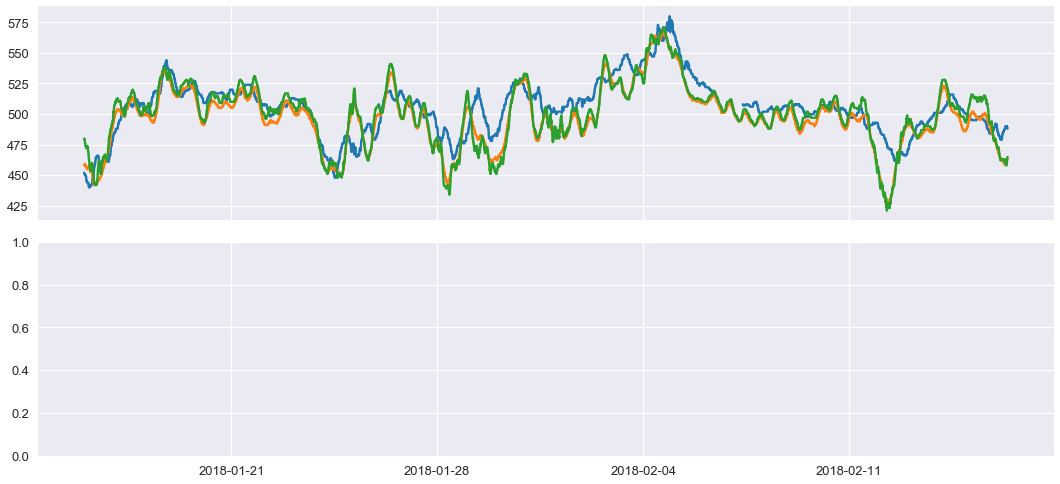

In [5]:
fig, ax = plt.subplots(2, 1, figsize=(15, 7), sharex=True)

stations = list(data.keys())

for station, station_data in data.items():
    ax[0].plot(station_data["timestamp"], 
               station_data["sealevelinm"],
               label=station);
    
    # Insert a second sub-plot with the anomalies
    # ax[1] = ...
    
# add a caption to the vertical axes

# ax[0]....
# ax[1]....

# add a legend

# Harmonize padding of subplots, labels, etc:
fig.tight_layout()